In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [4]:
hsedata = pd.read_csv('train.csv')
hsedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
hsedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Problem 1(a)

In [6]:
price = pd.DataFrame(hsedata['SalePrice'])
liv = pd.DataFrame(hsedata['GrLivArea'])

In [43]:
price

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


Train set has 0.8 x 1460 = 1168 samples

Test set has 0.2 x 1460 = 292 samples

To ensure data is split in a less unbiased way than taking the first 80% and last 20% of the sample, we use df.sample to randomise the order of the data, and then reset the index. After doing so, an extra column with the original indexes is created, whichI then discarded.

In [7]:
shuffled_p = price.sample(frac = 1)
shuffledp = shuffled_p.reset_index()
shuffledpp = pd.DataFrame(shuffledp['SalePrice'])
shuffled_l = liv.sample(frac = 1)
shuffledl = shuffled_l.reset_index()
shuffledll = pd.DataFrame(shuffledl['GrLivArea'])

In [8]:
price_train = pd.DataFrame(shuffledpp[0:1168])
liv_train = pd.DataFrame(shuffledll[0:1168])

price_test = pd.DataFrame(shuffledpp[1168:1461])
liv_test = pd.DataFrame(shuffledll[1168:1461])

print("Train Set :", price_train.shape, liv_train.shape)
print("Test Set  :", price_test.shape, liv_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [51]:
price_train.describe()

,SalePrice
count,1168.00000
mean,181914.65411
std,80476.80269
min,34900.00000
25%,130187.50000
50%,165000.00000
75%,215000.00000
max,755000.00000


In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

Predictor: liv_train

Response: price_train

In [11]:
linreg.fit(liv_train, price_train)

LinearRegression()

In [12]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [186557.67826425]
Coefficients 	: a =  [[-3.06518397]]


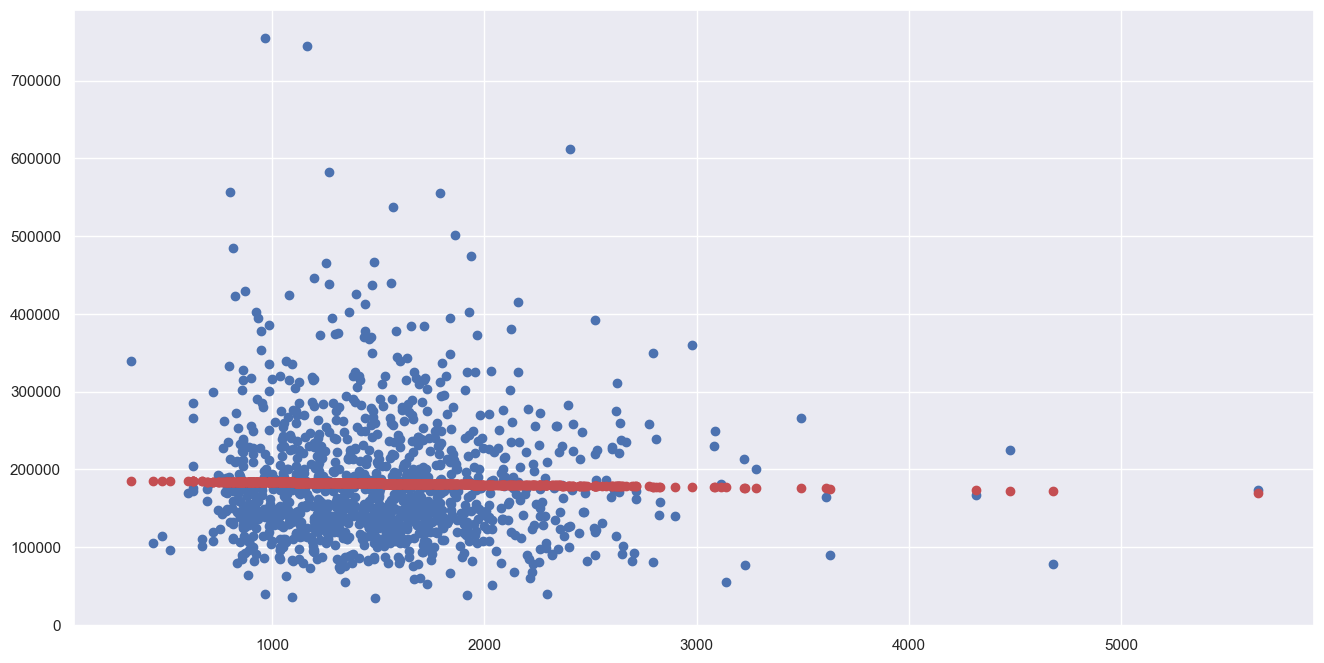

In [13]:
train_pred = linreg.predict(liv_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(liv_train, price_train)
plt.scatter(liv_train, train_pred, color = "r")
plt.show()

# Problem 1(b)

In [14]:
print("Explained Variance (R^2) \t:", linreg.score(liv_train, price_train))

Explained Variance (R^2) 	: 0.0003998096593222922


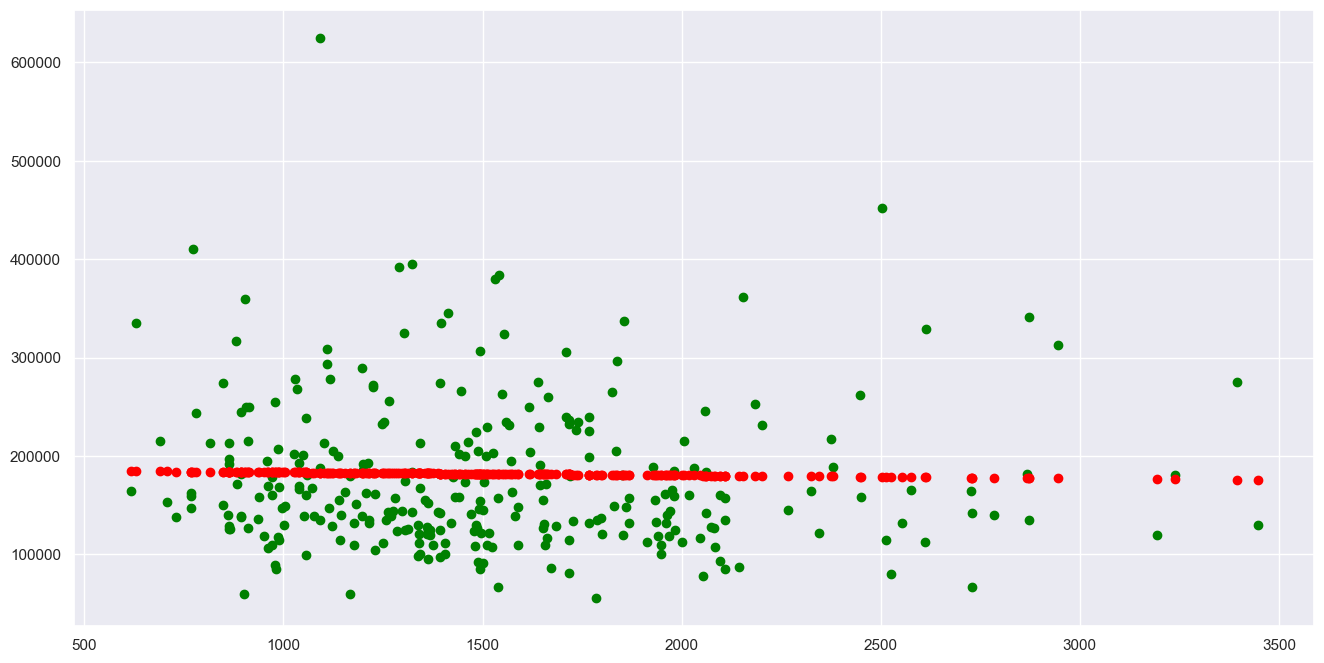

In [15]:
test_pred = linreg.predict(liv_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(liv_test, price_test, color = "green")
plt.scatter(liv_test, test_pred, color = "red")
plt.show()

In [16]:
print("Explained Variance (R^2) \t:", linreg.score(liv_test, price_test))

Explained Variance (R^2) 	: -0.0030728052312809506


In [17]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(price_train, train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 6468383652.44775
Root Mean Squared Error (RMSE) 	: 80426.26220612114


In [18]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(price_test, test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 5647621384.055646
Root Mean Squared Error (RMSE) 	: 75150.65790833534


# Problem 2

In [19]:
base = pd.DataFrame(hsedata['TotalBsmtSF'])
gar = pd.DataFrame(hsedata['GarageArea'])

In [20]:
shuffled_b = base.sample(frac = 1)
shuffledb = shuffled_b.reset_index()
shuffledbb = pd.DataFrame(shuffledb['TotalBsmtSF'])
shuffled_g = gar.sample(frac = 1)
shuffledg = shuffled_g.reset_index()
shuffledgg = pd.DataFrame(shuffledg['GarageArea'])

In [21]:
base_train = pd.DataFrame(shuffledbb[0:1168])
gar_train = pd.DataFrame(shuffledgg[0:1168])

base_test = pd.DataFrame(shuffledbb[1168:1461])
gar_test = pd.DataFrame(shuffledgg[1168:1461])

print("Train Set :", base_train.shape, gar_train.shape)
print("Test Set  :", base_test.shape, gar_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


first, we look at the relationship between basement area and saleprices

In [22]:
linreg.fit(base_train, price_train)

LinearRegression()

In [23]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [182101.28232326]
Coefficients 	: a =  [[-0.17586832]]


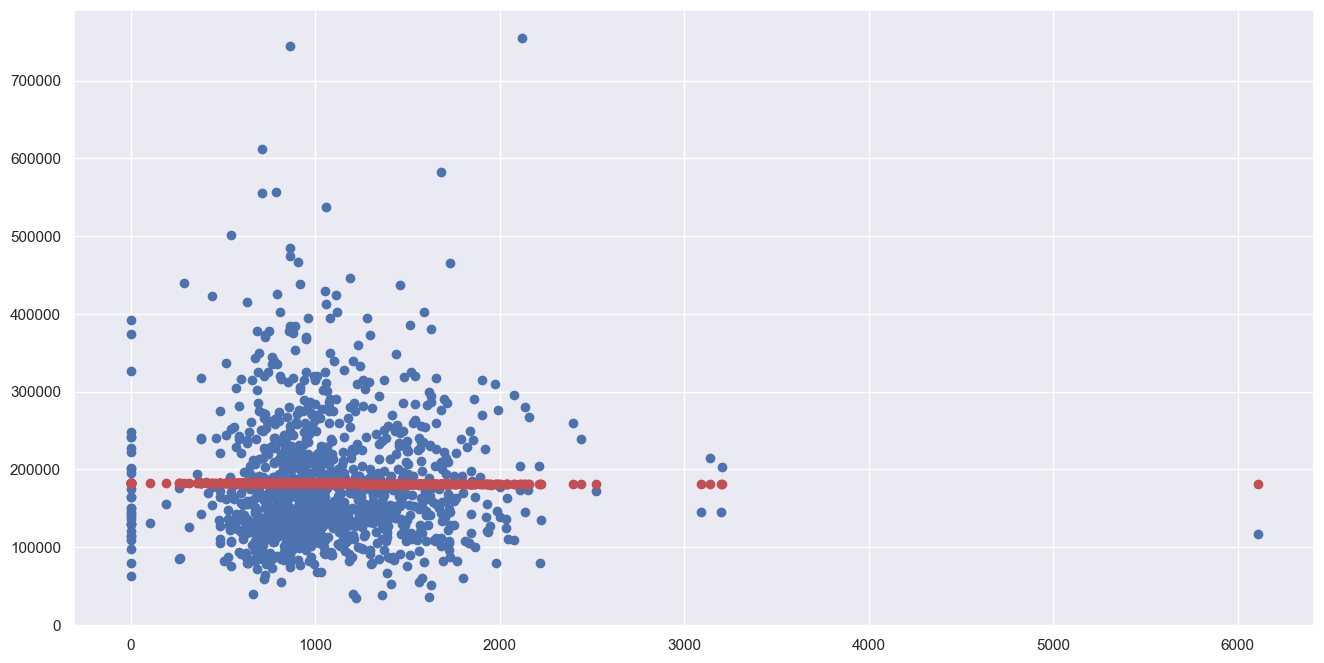

In [24]:
train_pred = linreg.predict(base_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(base_train, price_train)
plt.scatter(base_train, train_pred, color = "r")
plt.show()

In [25]:
print("Explained Variance (R^2) \t:", linreg.score(base_train, price_train))

Explained Variance (R^2) 	: 9.642421103794874e-07


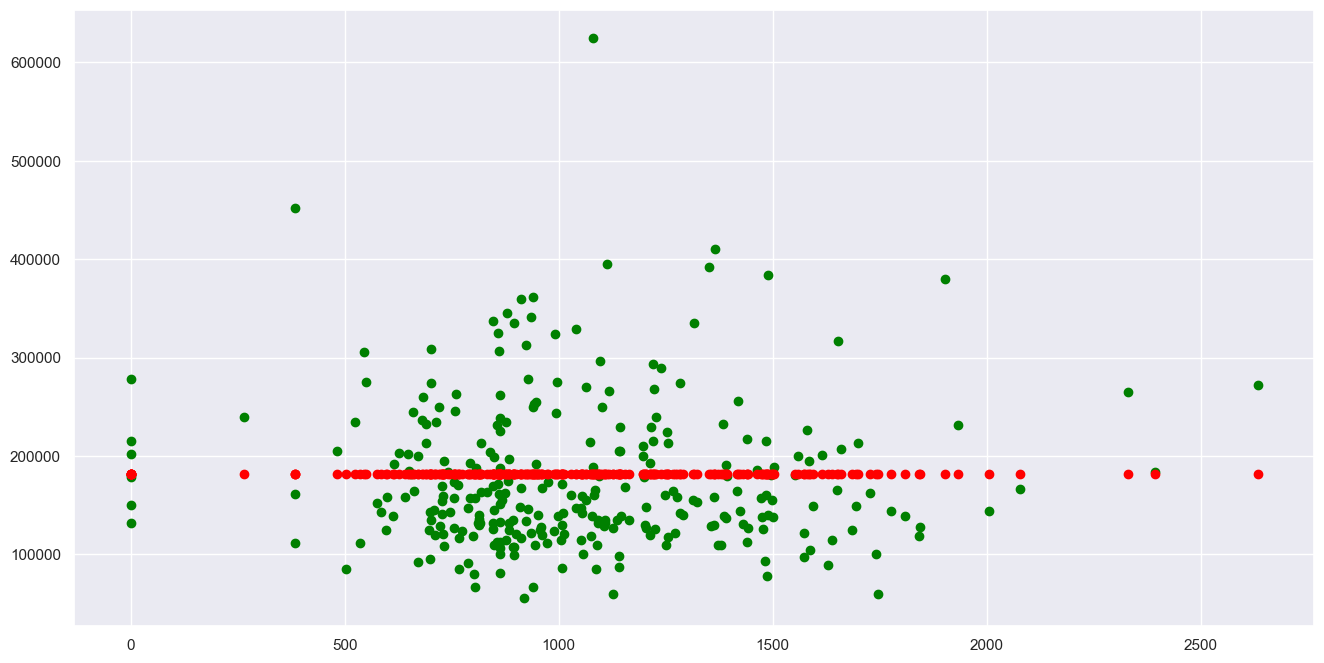

In [26]:
test_pred = linreg.predict(base_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(base_test, price_test, color = "green")
plt.scatter(base_test, test_pred, color = "red")
plt.show()

In [27]:
print("Explained Variance (R^2) \t:", linreg.score(base_test, price_test))

Explained Variance (R^2) 	: -0.004376818776566704


In [28]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(price_train, train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 6470964569.499866
Root Mean Squared Error (RMSE) 	: 80442.30584400143


In [29]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(price_test, test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 5654963398.259446
Root Mean Squared Error (RMSE) 	: 75199.49067819174


now, we look at the relationship between garage area and saleprices instead

In [30]:
linreg.fit(gar_train, price_train)

LinearRegression()

In [31]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [187394.71458894]
Coefficients 	: a =  [[-11.57529643]]


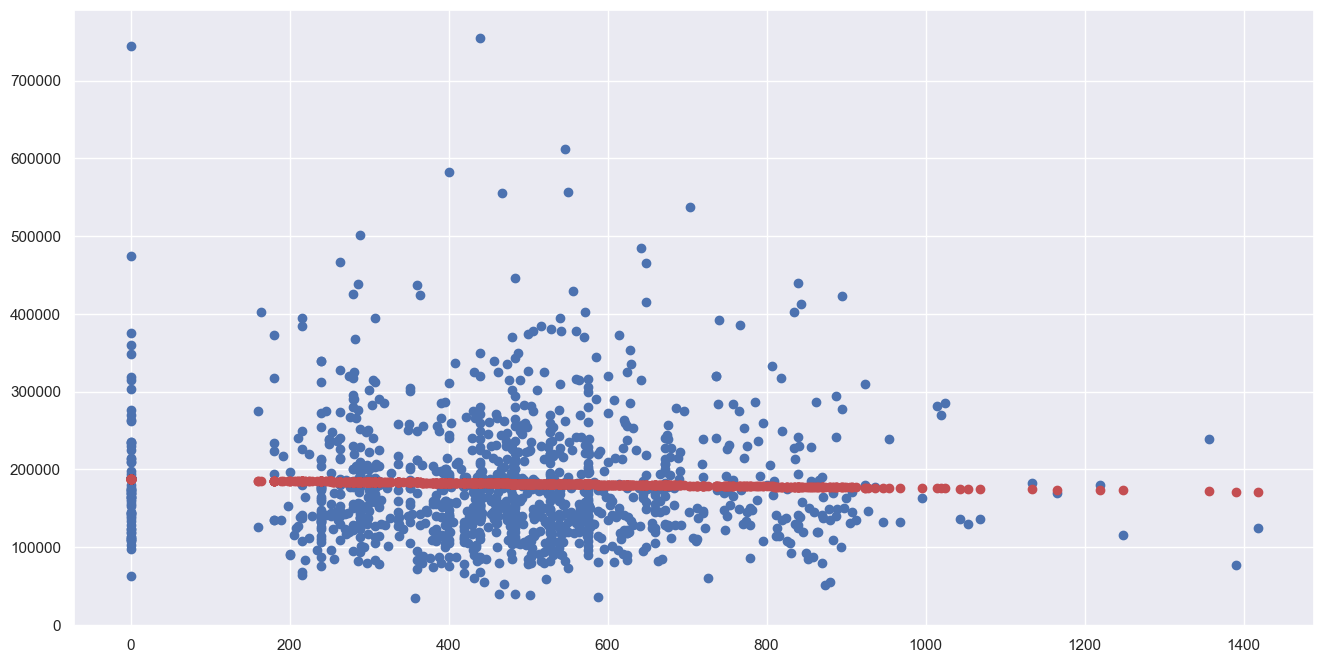

In [32]:
train_pred = linreg.predict(gar_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(gar_train, price_train)
plt.scatter(gar_train, train_pred, color = "r")
plt.show()

In [33]:
print("Explained Variance (R^2) \t:", linreg.score(gar_train, price_train))

Explained Variance (R^2) 	: 0.0009368284792020676


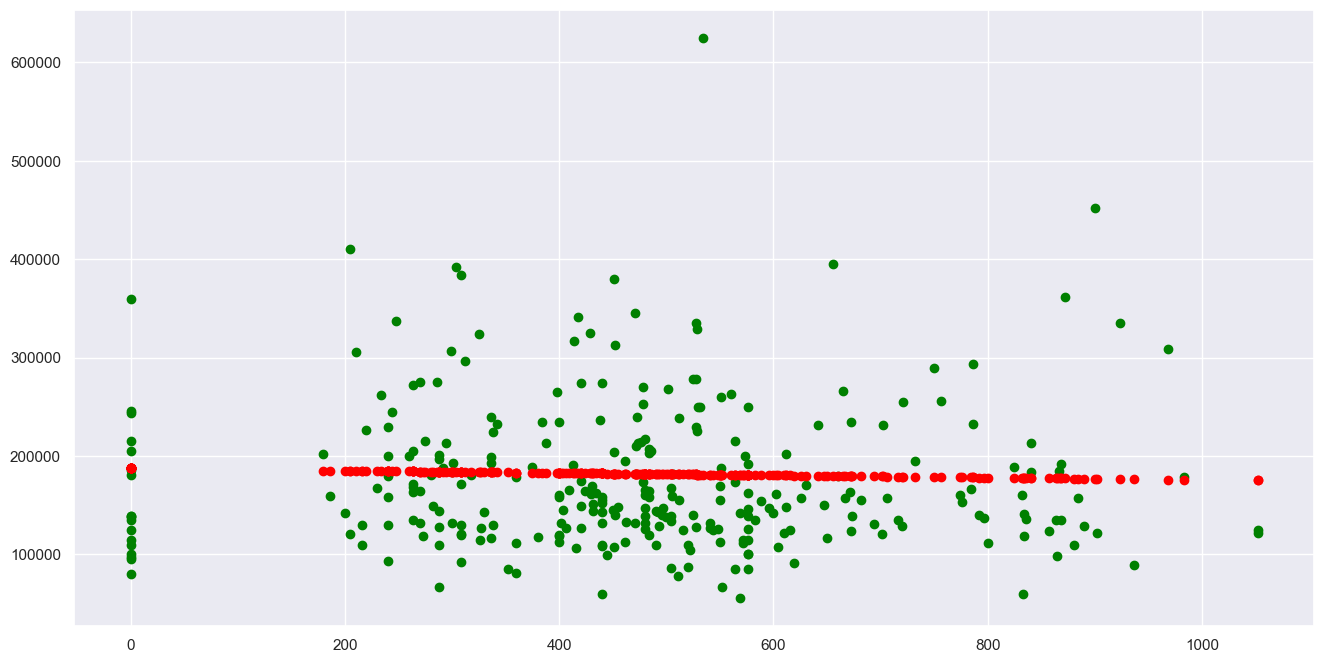

In [34]:
test_pred = linreg.predict(gar_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(gar_test, price_test, color = "green")
plt.scatter(gar_test, test_pred, color = "red")
plt.show()

In [35]:
print("Explained Variance (R^2) \t:", linreg.score(gar_test, price_test))

Explained Variance (R^2) 	: -0.004509227229615886


In [36]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(price_train, train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 6464908619.340381
Root Mean Squared Error (RMSE) 	: 80404.65545812868


In [37]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(price_test, test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 5655708900.287785
Root Mean Squared Error (RMSE) 	: 75204.4473438093


Overall, TotalBsmtSF is the best model to use as it has the lowest explained variance.

# Problem 3(a)

In [38]:
def FindOutlierBound(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print("Lower:", q1 - 1.5 * iqr)
    print("Upper:", q3 + 1.5 * iqr)


FindOutlierBound(hsedata, "SalePrice")
FindOutlierBound(hsedata, "GrLivArea")
#! Bit wise comparisons
df_filtered = hsedata[(hsedata["SalePrice"] <= 340037.5) & (hsedata["SalePrice"] >= 3937.5) & (hsedata["GrLivArea"] <= 2747.625)& (hsedata["GrLivArea"] >= 158.625)]

SalePrice_Cleaned = pd.DataFrame(df_filtered['SalePrice'])
GrLivArea_Cleaned = pd.DataFrame(df_filtered['GrLivArea'])

Lower: 3937.5
Upper: 340037.5
Lower: 158.625
Upper: 2747.625


# Problem 3(b)

In [39]:
from sklearn.model_selection import train_test_split

Intercept of Regression 	: b =  [35292.21285252]
Coefficients of Regression 	: a =  [[92.18687602]]



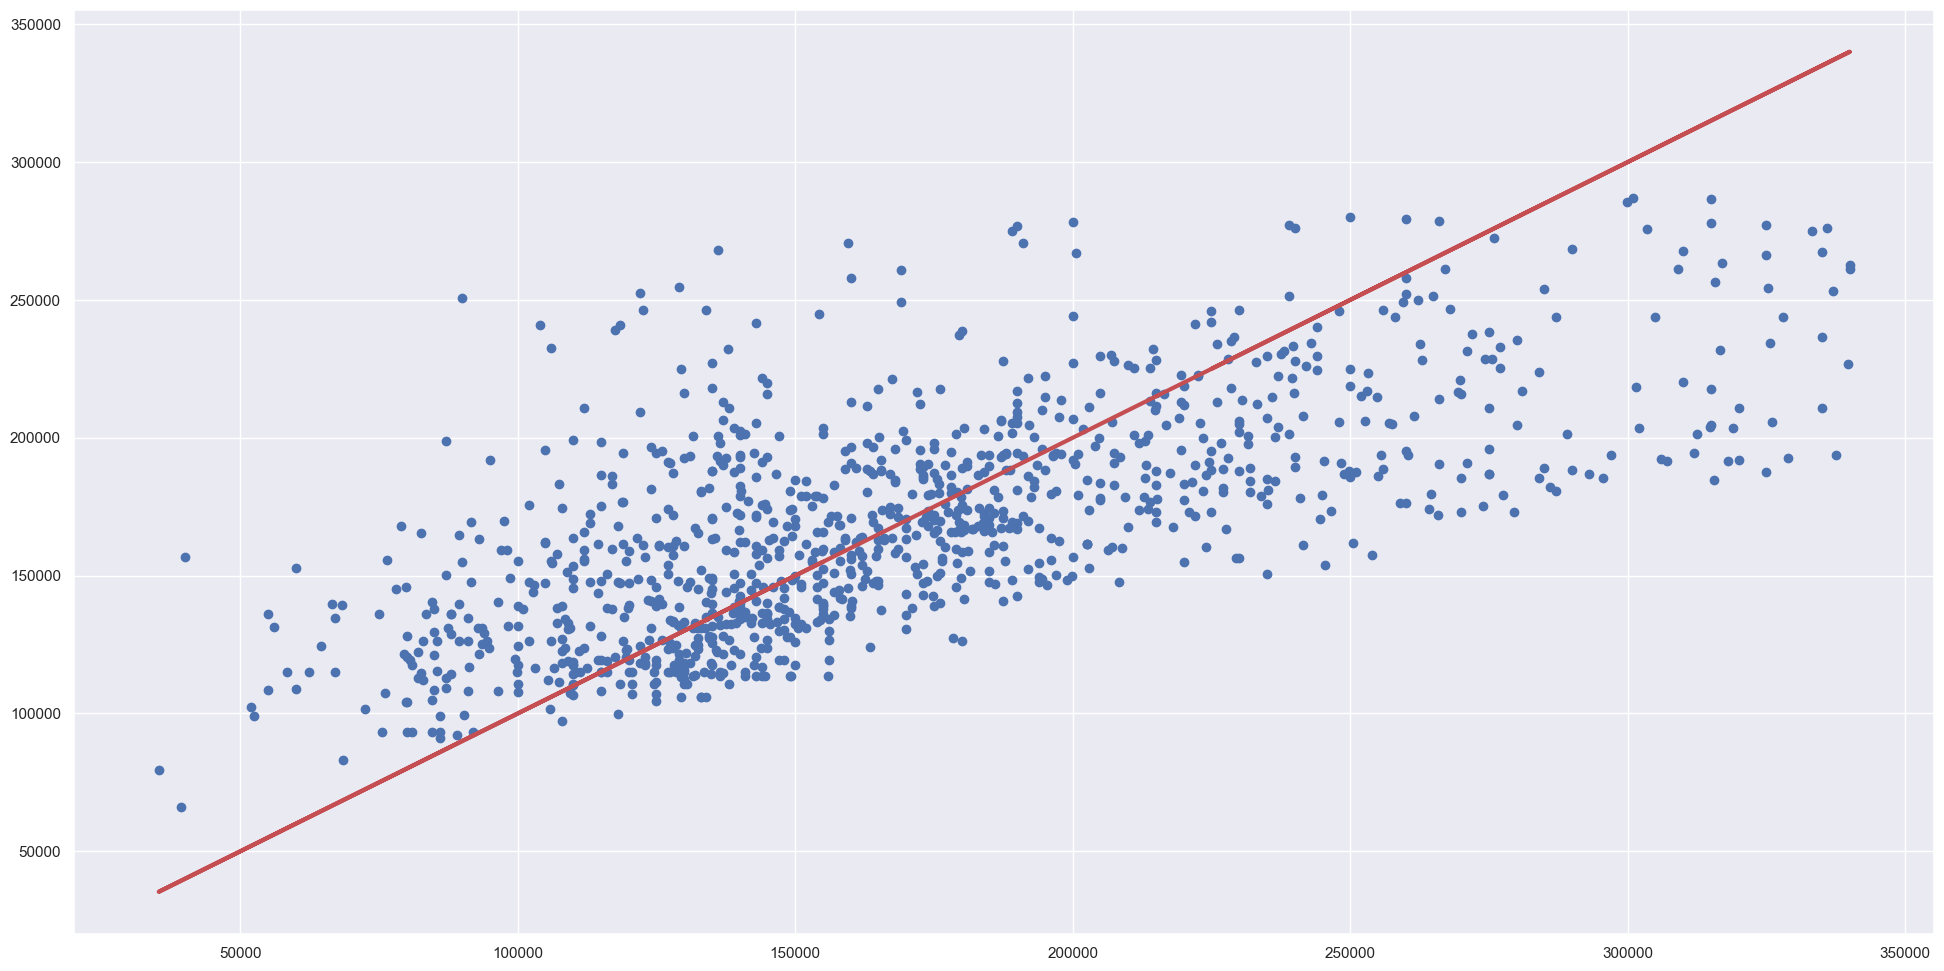

In [40]:

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(GrLivArea_Cleaned, SalePrice_Cleaned, test_size = 0.20)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(y_train, y_train_pred, color = "b")
    plt.plot(y_train, y_train, 'r-', linewidth = 3)

# Problem 3(c)

In [41]:
# function to test goodness of fit using the Test Set
def gof_func(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#Train Set
def gof_func_train(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

print("Train: GrLivArea_Cleaned vs. SalePrice_Cleaned")
gof_func_train(GrLivArea_Cleaned,SalePrice_Cleaned)
print("")
#Test Set
print("Test: GrLivArea_Cleaned vs. SalePrice_Cleaned")
gof_func(GrLivArea_Cleaned,SalePrice_Cleaned)

Train: GrLivArea_Cleaned vs. SalePrice_Cleaned
Explained Variance (R^2) 	: 0.467993242719996

Test: GrLivArea_Cleaned vs. SalePrice_Cleaned
Mean Squared Error (MSE) 	: 1961682645.23292
Root Mean Squared Error (RMSE) 	: 44290.886706329555


Train: GrLivArea_Cleaned vs. SalePrice_Cleaned
Explained Variance (R^2) 	: 0.49260916511954556

Test: GrLivArea_Cleaned vs. SalePrice_Cleaned
Mean Squared Error (MSE) 	: 1533487811.5613878
Root Mean Squared Error (RMSE) 	: 39159.77287423138
Comparing to the model obtained in Question 1, the Explained Variance on the train set is somewhat close to the original mode, but the Root Mean Squared Error is significantly lower. Thus, I conclude that the new model is better than the original model in terms of prediction.